In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn
from sklearn.naive_bayes import BernoulliNB
from collections import Counter
%matplotlib inline

# Let's analyze the IMDB Review

In [147]:
imdb = pd.read_csv('sentiment labelled sentences\imdb_labelled.txt', delimiter = '\t', header = None)
imdb.columns = ['sentence', 'score']
#Score is either 1 (for positive) or 0 (for negative)

In [148]:
imdb.head()

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [149]:
# To analyze the frequently used negative words
all_sent = ''.join(imdb.sentence.values)
all_sent_list = all_sent.replace(',','').split(' ')
d= Counter(all_sent_list)
print()
count_df = pd.DataFrame.from_dict(d,orient='index').reset_index().rename(columns={'index':'event', 0:'count'})
count_df.sort_values(by='count', ascending=False).to_csv('word_list_imdb.csv')

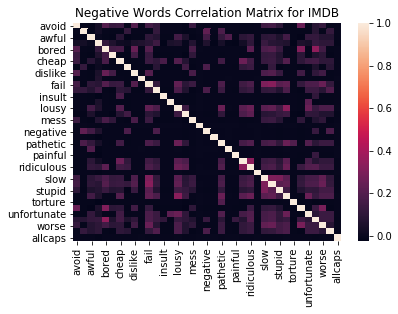

In [150]:
keywords_imdb= ['avoid','annoying','awful','bad','bored','boring','cheap',
           'disappoint','dislike','embarrassing','fail',
           'hate','insult',
           'lost','lousy', 'lack','mess','miserable','negative','nonsense',
           'pathetic','pitiful','painful',
           'pitiful','poor','ridiculous','ruthless',
           'slow','spoil','stupid','suffer','torture','terrible','unfortunate','waste','worse','worst']

# create columns for every keyword
data=pd.DataFrame()
for key in keywords_imdb:    
    data[str(key)] = imdb.sentence.str.contains(str(key)  ,case=False    )

data['allcaps']=imdb.sentence.str.isupper()
target = imdb['score']
plt.title('Negative Words Correlation Matrix for IMDB')
sns.heatmap(data.corr())


In [151]:
bnb = BernoulliNB()
# Fit our model to the data.
bnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 201


In [152]:
print('success rate = %s' % ((data.shape[0] - (target != y_pred).sum())/data.shape[0]))

success rate = 0.73128342246


# Analyze the amazon reviews

In [153]:
amazon = pd.read_csv("amazon_cells_labelled.txt", delimiter = '\t', header = None)
amazon.columns = ['sentence', 'score']

In [98]:
# To analyze the frequently used negative words
all_sent = ''.join(amazon.sentence.values)
all_sent_list = all_sent.replace(',','').split(' ')
d= Counter(all_sent_list)
print()
count_df = pd.DataFrame.from_dict(d,orient='index').reset_index().rename(columns={'index':'event', 0:'count'})
count_df.sort_values(by='count', ascending=False).to_csv('word_list_amazon.csv')

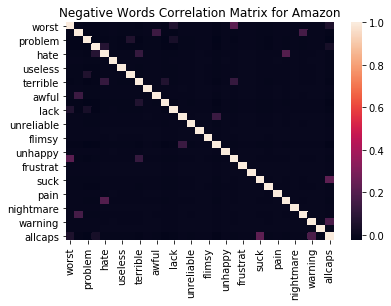

In [154]:
keywords_amazon= ['worst','cheap','problem','disappoint','hate','mistake','useless','horrible','terrible','trouble',
           'awful','waste','lack','uncomfortable','unreliable','embarrassing','flimsy','poor','unhappy','crap',
          'frustrat','distract','suck','flaw','pain','avoid','nightmare','worthless','warning','hurt']

# create columns for every keyword
data_amazon = pd.DataFrame()
for key in keywords_amazon:
    
    data_amazon[str(key)] = amazon.sentence.str.contains(str(key)  ,case=False    )

data_amazon['allcaps']=amazon.sentence.str.isupper()
target_amazon = amazon['score']
plt.title('Negative Words Correlation Matrix for Amazon')
sns.heatmap(data_amazon.corr())


In [155]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_amazon, target_amazon)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_amazon)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_amazon.shape[0],
    (target_amazon != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 369


In [156]:
print('success rate = %s' % ((data_amazon.shape[0] - (target_amazon != y_pred).sum())/data_amazon.shape[0]))

success rate = 0.631


# Let's analyze the yelp reviews.

In [157]:
yelp = pd.read_csv('sentiment labelled sentences\yelp_labelled.txt', delimiter = '\t', header = None)
yelp.columns = ['sentence', 'score']

In [159]:
all_sent = ''.join(yelp.sentence.values)
all_sent_list = all_sent.replace(',','').split(' ')
d= Counter(all_sent_list)
print()
count_df = pd.DataFrame.from_dict(d,orient='index').reset_index().rename(columns={'index':'event', 0:'count'})
count_df.sort_values(by='count', ascending=False).to_csv('word_list_yelp.csv')

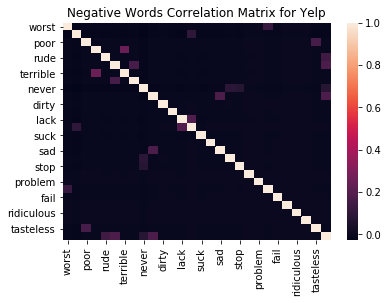

In [161]:
keyword_yelp=['worst','disappoint','poor','mediocre','rude','waste','terrible','horrible','never','avoid','dirty','wrong',
              'lack','hate','suck','sick','sad','insult','stop','mistake','problem','disgust',
             'fail','weak','ridiculous','waste','weird','tasteless'
             ]

# create columns for every keyword
data_yelp = pd.DataFrame()
for key in keyword_yelp:
    
    data_yelp[str(key)] = yelp.sentence.str.contains(str(key)  ,case=False    )

data_yelp['allcaps']=yelp.sentence.str.isupper()
target_yelp = yelp['score']
plt.title('Negative Words Correlation Matrix for Yelp')
sns.heatmap(data_yelp.corr())


In [162]:
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data_yelp, target_yelp)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data_yelp)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data_yelp.shape[0],
    (target_yelp != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 363


In [163]:
print('success rate = %s' % ((data_yelp.shape[0] - (target_yelp != y_pred).sum())/data_yelp.shape[0]))

success rate = 0.637


Interestingly, the model seems to have performed fairly well on all 3 datasets, with accuracies >= 60% on all 3. The feature set was based mainly on my findings after collecting all words into a spreadsheet and finding the most frequently used words. Then I included many of the key 'negative' words that I saw in those reviews. 

I also was able to improve the model accuracy quite a bit by removing the required spaces before and after keywords - I found that many of the reviews actually began with one of my negative keywords and ended with either a '.' or ',' and the model was not detecting them before.
